# Solution 2:

### 1) Generating training dataset:

In [365]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go

In [366]:
N = 1000
prior = [0.35, 0.65]
l_1 = 0
l_2 = 0

mu_x = [0, 0]
variance_x = [[1, 0], [0, 1]]

C = np.linspace(0.5, 19.5, 20)
G = np.linspace(0.25, 5, 20)

In [367]:
for i in range(N):
    if np.random.uniform(0, 1, 1) <= prior[0]:
        l_1 = l_1 + 1

l_2 = N - l_1

In [368]:
#Generating training dataset
data = []
data_1 = []
true_label = []
for i in range(l_1):
    temp = np.random.multivariate_normal(mu_x, variance_x, 1)
    data_1.append(temp)
    data.append(temp)
    true_label.append(0)
data_1 = np.array(data_1).reshape((l_1, 2))


data_2 = []
for i in range(l_2):
    radius = float(np.random.uniform(2, 3, 1))
    angle_rad = float(np.random.uniform(-math.pi, math.pi, 1))
    cartesian = [[radius*math.cos(angle_rad), radius*math.sin(angle_rad)]]
    data_2.append(np.array(cartesian))
    data.append(np.array(cartesian))
    true_label.append(1)
data_2 = np.array(data_2).reshape((l_2, 2))
data = np.array(data).reshape((N, 2))


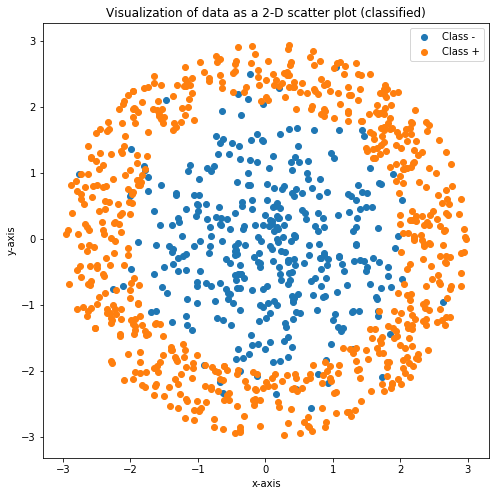

In [369]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(data_1)[:, 0], np.array(data_1)[:, 1], alpha=1, label='Class -')
ax.scatter(np.array(data_2)[:, 0], np.array(data_2)[:, 1], alpha=1, label='Class +')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Visualization of data as a 2-D scatter plot (classified)')
ax.legend()
plt.show()

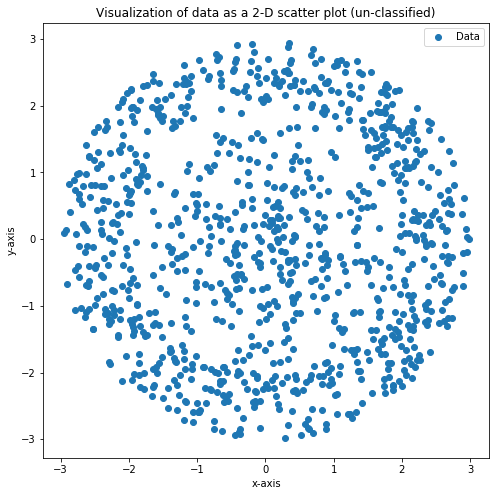

In [370]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(data)[:, 0], np.array(data)[:, 1], alpha=1, label='Data')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Visualization of data as a 2-D scatter plot (un-classified)')
ax.legend()
plt.show()

### 2) Finding optimal hyperparameters for Linear-SVM and Gaussian-SVM

#### Linear-SVM

In [371]:
lin_accuracy = []
for c in range(len(C)):
    lin_score = []
    for i in range(10):
        new_data = []
        new_true_label = []
        test_data = []
        test_data_label = []
        for j in range(0, int(0.1*N*i), 1):
            new_data.append(data[int(j), :])
            new_true_label.append(true_label[int(j)])
        for j in range(int(0.1*N*(i+1)), N, 1):
            new_data.append(data[int(j), :])
            new_true_label.append(true_label[int(j)])
        for j in range(int(0.1*N*i), int(0.1*N*(i+1)), 1):
            test_data.append(data[int(j), :])
            test_data_label.append(true_label[int(j)])
        lin_svm = SVC(C = C[c], kernel = 'linear')
        lin_svm.fit(new_data, new_true_label)
        lin_result = lin_svm.score(test_data, test_data_label)
        lin_score.append(lin_result)
#     print(lin_score)
    lin_accuracy.append([C[c], sum(lin_score)/len(lin_score)])
        
lin_best = np.argmax(np.array(lin_accuracy)[:, 1])

In [427]:
print("Index no.  \t\t C \t\t  Accuracy")
for i in range(len(lin_accuracy)):
    print("{} \t\t\t {} \t\t {}".format(i, np.array(lin_accuracy)[i, 0], np.array(lin_accuracy)[i, 1]))

Index no.  		 C 		  Accuracy
0 			 0.5 		 0.6439999999999999
1 			 1.5 		 0.6439999999999999
2 			 2.5 		 0.6439999999999999
3 			 3.5 		 0.6439999999999999
4 			 4.5 		 0.6439999999999999
5 			 5.5 		 0.6439999999999999
6 			 6.5 		 0.6439999999999999
7 			 7.5 		 0.6439999999999999
8 			 8.5 		 0.6439999999999999
9 			 9.5 		 0.6439999999999999
10 			 10.5 		 0.6439999999999999
11 			 11.5 		 0.6439999999999999
12 			 12.5 		 0.6439999999999999
13 			 13.5 		 0.6439999999999999
14 			 14.5 		 0.6439999999999999
15 			 15.5 		 0.6439999999999999
16 			 16.5 		 0.6439999999999999
17 			 17.5 		 0.6439999999999999
18 			 18.5 		 0.6439999999999999
19 			 19.5 		 0.6439999999999999


In [372]:
fig = go.Figure(data = [go.Table(header = dict(values = ['Index no.', 'C', 'Accuracy']), cells = dict(values = [np.arange(len(lin_accuracy)), np.array(lin_accuracy)[:, 0], np.array(lin_accuracy)[:, 1]]))])
fig.show()

print("The optimal hyperparameter pair is C = {} found at index number {}".format(np.array(lin_accuracy)[lin_best, 0], lin_best))

The optimal hyperparameter pair is C = 0.5 found at index number 0


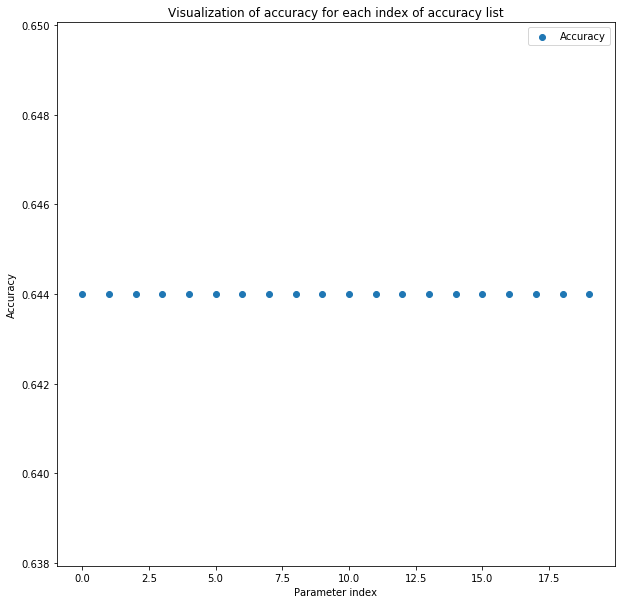

In [373]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.arange(len(lin_accuracy)), np.array(lin_accuracy)[:, 1], label='Accuracy')
plt.xlabel('Parameter index')
plt.ylabel('Accuracy')
plt.title('Visualization of accuracy for each index of accuracy list')
ax.legend()
plt.show()

#### Gaussian-SVM

In [374]:
gaus_accuracy = []
for c in range(len(C)):
    for g in range(len(G)):
        gaus_score = []
        for i in range(10):
            new_data = []
            new_true_label = []
            test_data = []
            test_data_label = []
            for j in range(0, int(0.1*N*i), 1):
                new_data.append(data[int(j), :])
                new_true_label.append(true_label[int(j)])
            for j in range(int(0.1*N*(i+1)), N, 1):
                new_data.append(data[int(j), :])
                new_true_label.append(true_label[int(j)])
            for j in range(int(0.1*N*i), int(0.1*N*(i+1)), 1):
                test_data.append(data[int(j), :])
                test_data_label.append(true_label[int(j)])
            gaus_svm = SVC(C = C[c], kernel = 'rbf', gamma = G[g])
            gaus_svm.fit(new_data, new_true_label)
            gaus_result = gaus_svm.score(test_data, test_data_label)
            gaus_score.append(gaus_result)
#         print(gaus_score)
        gaus_accuracy.append([C[c], G[g], sum(gaus_score)/len(gaus_score)])
    
gaus_best = np.argmax(np.array(gaus_accuracy)[:, 2])

In [429]:
print("Index no.  \t\t C \t\t Gamma \t\t Accuracy")
for i in range(len(gaus_accuracy)):
    print("{} \t\t\t {} \t\t {} \t\t {}".format(i, np.array(gaus_accuracy)[i, 0], np.array(gaus_accuracy)[i, 1], np.array(gaus_accuracy)[i, 2]))

Index no.  		 C 		 Gamma 		 Accuracy
0 			 0.5 		 0.25 		 0.933
1 			 0.5 		 0.5 		 0.9359999999999999
2 			 0.5 		 0.75 		 0.9350000000000002
3 			 0.5 		 1.0 		 0.9359999999999999
4 			 0.5 		 1.25 		 0.937
5 			 0.5 		 1.5 		 0.9390000000000001
6 			 0.5 		 1.75 		 0.9390000000000001
7 			 0.5 		 2.0 		 0.9390000000000001
8 			 0.5 		 2.25 		 0.9400000000000001
9 			 0.5 		 2.5 		 0.9400000000000001
10 			 0.5 		 2.75 		 0.9410000000000001
11 			 0.5 		 3.0 		 0.9410000000000001
12 			 0.5 		 3.25 		 0.9410000000000001
13 			 0.5 		 3.5 		 0.942
14 			 0.5 		 3.75 		 0.942
15 			 0.5 		 4.0 		 0.942
16 			 0.5 		 4.25 		 0.942
17 			 0.5 		 4.5 		 0.942
18 			 0.5 		 4.75 		 0.942
19 			 0.5 		 5.0 		 0.942
20 			 1.5 		 0.25 		 0.9400000000000001
21 			 1.5 		 0.5 		 0.942
22 			 1.5 		 0.75 		 0.942
23 			 1.5 		 1.0 		 0.9410000000000001
24 			 1.5 		 1.25 		 0.942
25 			 1.5 		 1.5 		 0.9410000000000001
26 			 1.5 		 1.75 		 0.943
27 			 1.5 		 2.0 		 0.944
28 			 1.5 		 2.25 		

In [375]:
fig = go.Figure(data = [go.Table(header = dict(values = ['Index no.', 'C', 'Gamma', 'Accuracy']), cells = dict(values = [np.arange(len(gaus_accuracy)), np.array(gaus_accuracy)[:, 0], np.array(gaus_accuracy)[:, 1], np.array(gaus_accuracy)[:, 2]]))])
fig.show()

print("The optimal hyperparameter pair is C = {} and Gamma = {} found at index number {}".format(np.array(gaus_accuracy)[gaus_best, 0], np.array(gaus_accuracy)[gaus_best, 1], gaus_best))

The optimal hyperparameter pair is C = 1.5 and Gamma = 4.75 found at index number 38


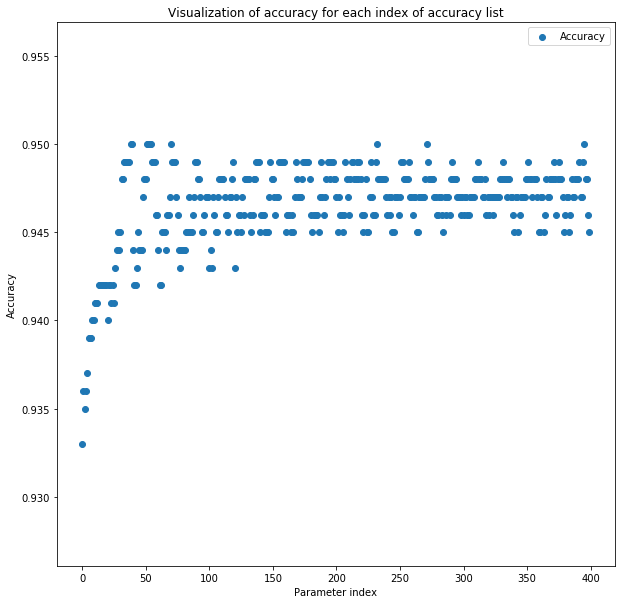

In [376]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.arange(len(gaus_accuracy)), np.array(gaus_accuracy)[:, 2], label='Accuracy')
plt.xlabel('Parameter index')
plt.ylabel('Accuracy')
plt.title('Visualization of accuracy for each index of accuracy list')
ax.legend()
plt.show()

### 3) Classification of entire training dataset using optimal hyperparameters

#### Linear-SVM

In [377]:
lin_svm = SVC(C = np.array(lin_accuracy)[lin_best, 0], kernel = 'linear')
lin_svm.fit(data, true_label)
lin_label = lin_svm.predict(data)
lin_score = lin_svm.score(data, true_label)

In [378]:
lin_error_1 = []
lin_right_1 = []
lin_error_2 = []
lin_right_2 = []

for i in range(l_1):
    if lin_label[i] == 1:
        lin_error_1.append(data[i])
    else:
        lin_right_1.append(data[i])
        
for i in range(l_2):
    if lin_label[l_1+i] == 0:
        lin_error_2.append(data[l_1+i])
    else:
        lin_right_2.append(data[l_1+i])

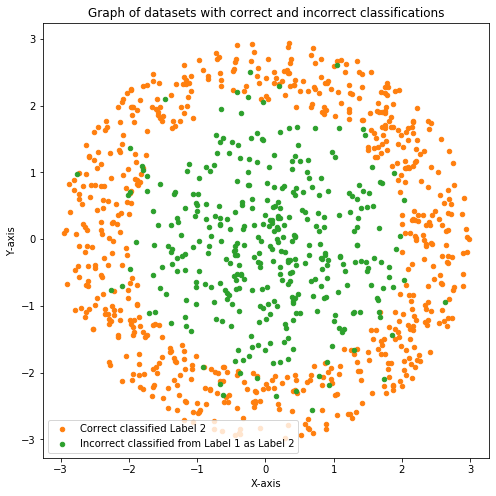

In [379]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
if len(lin_right_1) > 0:
    ax.scatter(np.array(lin_right_1)[:, 0], np.array(lin_right_1)[:, 1], s=20, color='tab:blue', alpha=1, label='Correct classified Label 1')
if len(lin_right_2) > 0:
    ax.scatter(np.array(lin_right_2)[:, 0], np.array(lin_right_2)[:, 1], s=20, color='tab:orange', alpha=1, label='Correct classified Label 2')
if len(lin_error_1) > 0:
    ax.scatter(np.array(lin_error_1)[:, 0], np.array(lin_error_1)[:, 1], s=20, color='tab:green', alpha=1, label='Incorrect classified from Label 1 as Label 2')
if len(lin_error_2) > 0:
    ax.scatter(np.array(lin_error_2)[:, 0], np.array(lin_error_2)[:, 1], s=20, color='tab:red', alpha=1, label='Incorrect classified from Label 2 as Label 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph of datasets with correct and incorrect classifications')
ax.legend()
plt.show()

In [380]:
print("The accuracy is: {}".format(lin_score))
print("The total number of errors are: {}".format(len(lin_error_1) + len(lin_error_2)))
print("The error probability is {}.".format((len(lin_error_1) + len(lin_error_2))/N))

The accuracy is: 0.644
The total number of errors are: 356
The error probability is 0.356.


#### Gaussian-SVM

In [381]:
gaus_svm = SVC(C = np.array(gaus_accuracy)[gaus_best, 0], kernel = 'rbf', gamma = np.array(gaus_accuracy)[gaus_best, 1])
gaus_svm.fit(data, true_label)
gaus_label = gaus_svm.predict(data)
gaus_score = gaus_svm.score(data, true_label)

In [382]:
gaus_error_1 = []
gaus_right_1 = []
gaus_error_2 = []
gaus_right_2 = []

for i in range(l_1):
    if gaus_label[i] == 1:
        gaus_error_1.append(data[i])
    else:
        gaus_right_1.append(data[i])
        
for i in range(l_2):
    if gaus_label[l_1+i] == 0:
        gaus_error_2.append(data[l_1+i])
    else:
        gaus_right_2.append(data[l_1+i])

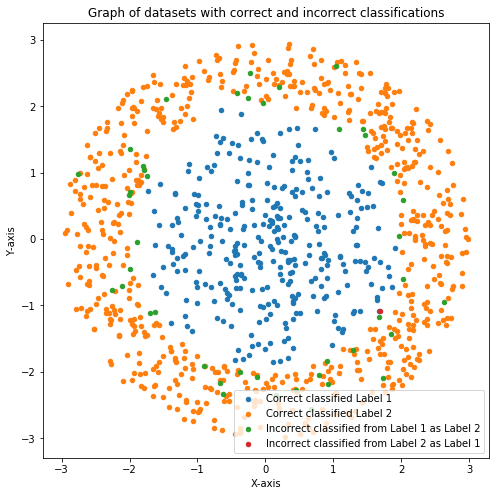

In [383]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
if len(gaus_right_1) > 0:
    ax.scatter(np.array(gaus_right_1)[:, 0], np.array(gaus_right_1)[:, 1], s=20, color='tab:blue', alpha=1, label='Correct classified Label 1')
if len(gaus_right_2) > 0:
    ax.scatter(np.array(gaus_right_2)[:, 0], np.array(gaus_right_2)[:, 1], s=20, color='tab:orange', alpha=1, label='Correct classified Label 2')
if len(gaus_error_1) > 0:
    ax.scatter(np.array(gaus_error_1)[:, 0], np.array(gaus_error_1)[:, 1], s=20, color='tab:green', alpha=1, label='Incorrect classified from Label 1 as Label 2')
if len(gaus_error_2) > 0:
    ax.scatter(np.array(gaus_error_2)[:, 0], np.array(gaus_error_2)[:, 1], s=20, color='tab:red', alpha=1, label='Incorrect classified from Label 2 as Label 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph of datasets with correct and incorrect classifications')
ax.legend()
plt.show()

In [384]:
print("The accuracy is: {}".format(gaus_score))
print("The total number of errors are: {}".format(len(gaus_error_1) + len(gaus_error_2)))
print("The error probability is {}.".format((len(gaus_error_1) + len(gaus_error_2))/N))

The accuracy is: 0.956
The total number of errors are: 44
The error probability is 0.044.


### 4) Classification of test dataset on trained classifier

#### Generating test dataset

In [415]:
#Generating test data for part 4 of the question

test_N = 1000
test_l_1 = 0
test_l_2 = 0

for i in range(test_N):
    if np.random.uniform(0, 1, 1) <= prior[0]:
        test_l_1 = test_l_1 + 1
test_l_2 = test_N - test_l_1

test_samples_1 = []
test_samples = []
test_true_label = []
for i in range(test_l_1):
    temp = np.random.multivariate_normal(mu_x, variance_x, 1)
    test_samples_1.append(temp)
    test_samples.append(temp)
    test_true_label.append(0)
test_samples_1 = np.array(test_samples_1).reshape((test_l_1, 2))

test_samples_2 = []
for i in range(test_l_2):
    radius = float(np.random.uniform(2, 3, 1))
    angle_rad = float(np.random.uniform(-math.pi, math.pi, 1))
    cartesian = [[radius*math.cos(angle_rad), radius*math.sin(angle_rad)]]
    test_samples_2.append(np.array(cartesian))
    test_samples.append(np.array(cartesian))
    test_true_label.append(1)
test_samples_2 = np.array(test_samples_2).reshape((test_l_2, 2))
test_samples = np.array(test_samples).reshape((test_N, 2))

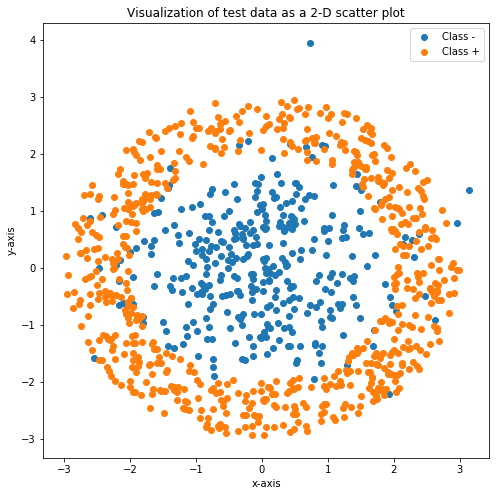

In [416]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(test_samples_1)[:, 0], np.array(test_samples_1)[:, 1], alpha=1, label='Class -')
ax.scatter(np.array(test_samples_2)[:, 0], np.array(test_samples_2)[:, 1], alpha=1, label='Class +')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Visualization of test data as a 2-D scatter plot')
ax.legend()
plt.show()

#### Linear-SVM

In [417]:
test_lin_label = lin_svm.predict(test_samples)
test_lin_score = lin_svm.score(test_samples, test_true_label)

In [418]:
test_lin_error_1 = []
test_lin_right_1 = []
test_lin_error_2 = []
test_lin_right_2 = []

for i in range(test_l_1):
    if test_lin_label[i] == 1:
        test_lin_error_1.append(test_samples[i])
    else:
        test_lin_right_1.append(test_samples[i])
        
for i in range(test_l_2):
    if test_lin_label[test_l_1+i] == 0:
        test_lin_error_2.append(test_samples[test_l_1+i])
    else:
        test_lin_right_2.append(test_samples[test_l_1+i])

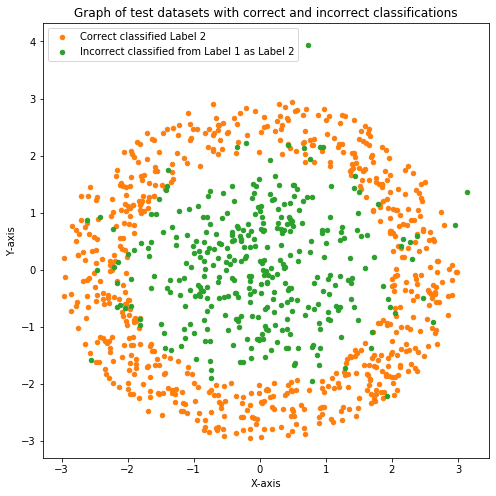

In [419]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
if len(test_lin_right_1) > 0:
    ax.scatter(np.array(test_lin_right_1)[:, 0], np.array(test_lin_right_1)[:, 1], s=20, color='tab:blue', alpha=1, label='Correct classified Label 1')
if len(test_lin_right_2) > 0:
    ax.scatter(np.array(test_lin_right_2)[:, 0], np.array(test_lin_right_2)[:, 1], s=20, color='tab:orange', alpha=1, label='Correct classified Label 2')
if len(test_lin_error_1) > 0:
    ax.scatter(np.array(test_lin_error_1)[:, 0], np.array(test_lin_error_1)[:, 1], s=20, color='tab:green', alpha=1, label='Incorrect classified from Label 1 as Label 2')
if len(test_lin_error_2) > 0:
    ax.scatter(np.array(test_lin_error_2)[:, 0], np.array(test_lin_error_2)[:, 1], s=20, color='tab:red', alpha=1, label='Incorrect classified from Label 2 as Label 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph of test datasets with correct and incorrect classifications')
ax.legend()
plt.show()

In [420]:
print("The accuracy is: {}".format(test_lin_score))
print("The total number of errors are: {}".format(len(test_lin_error_1) + len(test_lin_error_2)))
print("The error probability is {}.".format((len(test_lin_error_1) + len(test_lin_error_2))/test_N))

The accuracy is: 0.653
The total number of errors are: 347
The error probability is 0.347.


#### Gaussian-SVM

In [421]:
test_gaus_label = gaus_svm.predict(test_samples)
test_gaus_score = gaus_svm.score(test_samples, test_true_label)

In [422]:
test_gaus_error_1 = []
test_gaus_right_1 = []
test_gaus_error_2 = []
test_gaus_right_2 = []

for i in range(test_l_1):
    if test_gaus_label[i] == 1:
        test_gaus_error_1.append(test_samples[i])
    else:
        test_gaus_right_1.append(test_samples[i])
        
for i in range(test_l_2):
    if test_gaus_label[test_l_1+i] == 0:
        test_gaus_error_2.append(test_samples[test_l_1+i])
    else:
        test_gaus_right_2.append(test_samples[test_l_1+i])

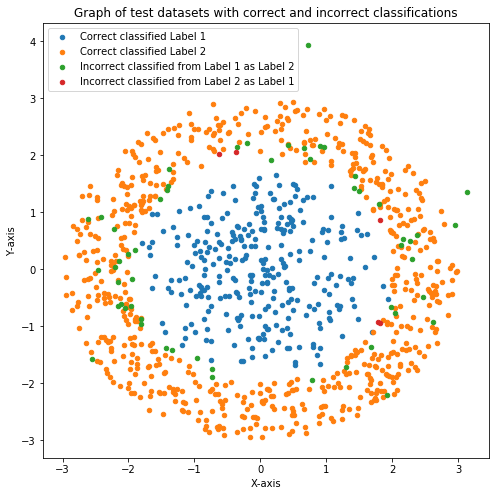

In [423]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
if len(test_gaus_right_1) > 0:
    ax.scatter(np.array(test_gaus_right_1)[:, 0], np.array(test_gaus_right_1)[:, 1], s=20, color='tab:blue', alpha=1, label='Correct classified Label 1')
if len(test_gaus_right_2) > 0:
    ax.scatter(np.array(test_gaus_right_2)[:, 0], np.array(test_gaus_right_2)[:, 1], s=20, color='tab:orange', alpha=1, label='Correct classified Label 2')
if len(test_gaus_error_1) > 0:
    ax.scatter(np.array(test_gaus_error_1)[:, 0], np.array(test_gaus_error_1)[:, 1], s=20, color='tab:green', alpha=1, label='Incorrect classified from Label 1 as Label 2')
if len(test_gaus_error_2) > 0:
    ax.scatter(np.array(test_gaus_error_2)[:, 0], np.array(test_gaus_error_2)[:, 1], s=20, color='tab:red', alpha=1, label='Incorrect classified from Label 2 as Label 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph of test datasets with correct and incorrect classifications')
ax.legend()
plt.show()

In [424]:
print("The accuracy is: {}".format(test_gaus_score))
print("The total number of errors are: {}".format(len(test_gaus_error_1) + len(test_gaus_error_2)))
print("The error probability is {}.".format((len(test_gaus_error_1) + len(test_gaus_error_2))/test_N))

The accuracy is: 0.941
The total number of errors are: 59
The error probability is 0.059.


## Comments:
#### Comments on results:
We can see above that the classification for the data using the linear-SVM technique gives a very high error for a variety of parameters. On the contrary, the classification works well with the Gaussian-SVM classifier. This is mainly because the data under consideration is not linear and infact is partly gaussian. Hence, the error probability achieved by the Gaussian-SVM is very low while that for Linear-SVM is large and entirely dependent on the prior prbability of the data.

In the Linear-SVM, the linear kernel tries to classify the data in the present space which is not possible since the data is partly Gaussian. In the Gaussian-SVM, the Gaussian kernel transforms the data into a higher dimensional space to carry out its classification and is thus able to classify the data more accurately.

#### Support Vector Machine (SVM):
SVM or Support Vector Machine is a classifier which aims to maximise the separation distance between the boundary and the closest data points of the classes from it. But when the data is present in a non-linear form, it cannot classify the data merely on this criteria. Hence, it uses non-linear classification techniques such as the Gausian-SVM. Here, the classifier transforms the data into a higher dimension and classifies the data using a higher dimensional vector or plane trying to maximise the gap between the boundary and the closest points of the classes.